In [ ]:
%load_ext autoreload
%autoreload 2
import time
import sys
import os
import numpy as np
path_project = "\\".join(os.getcwd().split("\\")[:-1])
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, path_project)

from calibration.mwphasetune import MWPhaseTune

from measurement.task_base import JobManager
import atexit
jm = JobManager()
def release_lock():
    return jm.stop()
atexit.register(release_lock)

<function __main__.release_lock()>

In [2]:
import hardware.config as hcf
from hardware.hardwaremanager import HardwareManager
from pathlib import Path
hw = HardwareManager()
# adds synthesizer, laser, and pulse generator 
hw.add_default_hardware()


Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 169.254.8.2
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0
VDI Sythesizer Serail Port Open


In [3]:
MWPhaseTune = MWPhaseTune()


In [4]:
jm.start()
jm.submit(MWPhaseTune)
time.sleep(10)

Failed to set command 'ACC=1'
Response from Device :'Not authorized'


In [5]:
print(MWPhaseTune.dataset)

{'num_repeat': 806.4, 'phasevolt': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595]), 'signal': array([0.009990

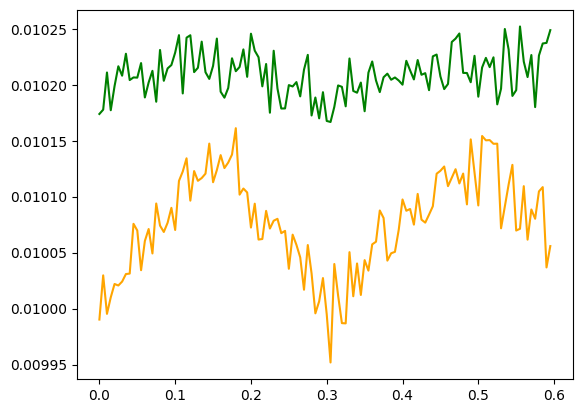

In [10]:
import matplotlib.pyplot as plt
# Plot the pODMR data using 'signal' and 'background'
freq = MWPhaseTune.dataset["phasevolt"]
signal = MWPhaseTune.dataset["signal"]
background = MWPhaseTune.dataset["background"]

# plt.figure(figsize=(8, 5))
plt.plot(freq, signal, label="Signal", color="orange")
plt.plot(freq, background, label="Background", color="green")

plt.show()


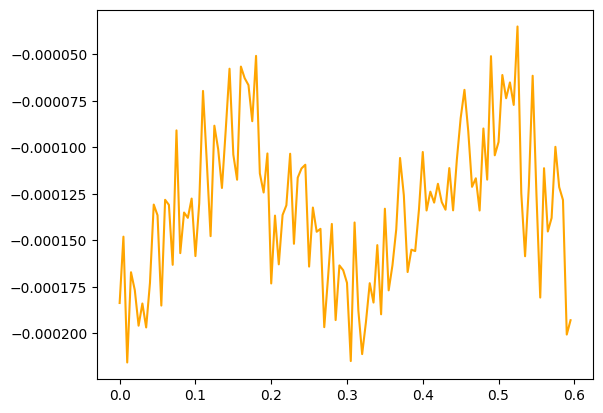

In [11]:
plt.plot(freq, signal-background, label="Signal", color="orange")
# plt.plot(freq, background, label="Background", color="green")

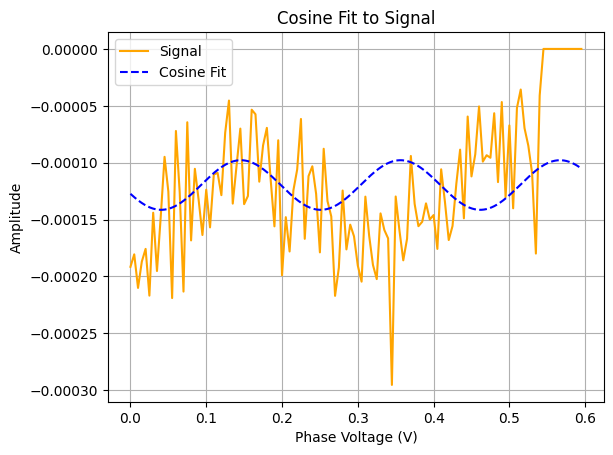

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Subtract background
ydata = signal - background
xdata = freq

# Define a cosine function to fit
def cosine(x, A, f, phi, offset):
    return A * np.cos(2 * np.pi * f * x + phi) + offset

# Initial guesses for amplitude, frequency, phase, and offset
initial_guess = [.00008, 0.05, 0, np.mean(ydata)]

# Fit the data
popt, _ = curve_fit(cosine, xdata, ydata, p0=initial_guess)

# Generate fitted curve
x_fit = np.linspace(min(xdata), max(xdata), 1000)
y_fit = cosine(x_fit, *popt)

# Plot original data and fitted cosine
plt.plot(xdata, ydata, label="Signal", color="orange")
plt.plot(x_fit, y_fit, label="Cosine Fit", color="blue", linestyle="--")
plt.legend()
plt.xlabel("Phase Voltage (V)")
plt.ylabel("Amplitude")
plt.title("Cosine Fit to Signal")
plt.grid(True)
plt.show()


In [9]:
popt

array([ 2.18111656e-05, -4.74982340e+00,  1.06326371e+01, -1.19658118e-04])